## Regressão Linear

A regressão linear é um dos modelos mais conhecidos no contexto do aprendizado de máquina, resumindo-se à adequação de um modelo linear a dados cujos preditores (features) são altamente correlacionados com o valor que se quer estimar (target). Ela pode ser implementada através do algoritmo de Gradiente Descendente Estocástico: um algoritmo iterativo de otimização dos parâmetros da função de regressão baseado na minimização da função de custo (ou de perda). Essa minimização é feita com o cálculo do gradiente negativo da função de custo em relação aos parâmetros da função de regressão (weights e bias).

Com n features, o modelo será da forma:

$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + ... + w_{m}x_{m} + b$

Em que $\hat{y}$ é a estimativa (ou predição) da label $y$, dados os valores das features $x_{1}, x_{2},...,x_{m}$, $(w_{1}, w_{2},...,w_{m})$ é o conjunto de pesos (weight) associado às features e $b$ é chamado de viés (bias).

Vamos definir a perda (loss) associada ao modelo através da função de perda $L_{2}$, da mesma forma que foi feito no primeiro modelo. Assim:

$loss = \frac{1}{n}\sum_{i = 1}^{n} (\hat{y_{i}} - y_{i})^2$

Como queremos reduzir a perda de nosso modelo ao máximo, devemos fazer os parâmetros variarem na direção do  negativo do gradiente de f (esse é o princípio do algoritmo de Gradiente Descendente Estocástico). 

Nesse contexto, chamemos $\theta = (w_{1}, w_{2}, ... , w_{m}, b)$. Além disso, definimos o hiperparâmetro $\alpha$ como a taxa de aprendizagem do modelo, de forma análoga ao modelo anterior.

Assim, por meio do gradiente descendente estocástico, o novo valor de $\theta$, $\theta'$, será dado pela fórmula:

$\theta' = \theta - \alpha \cdot \nabla f(w_{1}, w_{2}, ... , w_{m}, b)$

Onde $\nabla f(w_{1}, w_{2}, ... , w_{m}, b) = (\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial w_{2}},..., \frac{\partial f}{\partial w_{m}}, \frac{\partial f}{\partial b})$ é o gradiente de f.

Calculando as derivadas parciais:

$\frac{\partial f}{\partial w_{k}} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, para toda feature $x_{k}$.

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

Obtemos os novos valores do peso e do viés após uma iteração:

$w_{k}' = w_{k} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, para toda feature $x_{k}$.

$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

Iremos modificar o modelo anterior e adicionar o termo de complexidade à função de custo, definindo-o pela fórmula de regularização $L_{2}$. Tal termo é dado por:

$L_{2}$ regularization term = $ \sum_{i = 1}^{m} w_{i}^{2}$

Definimos $\lambda$ como o coeficiente de regularização, um hiperparâmetro do modelo que multiplica a função de complexidade. Quanto maior $\lambda$, maior o efeito de regularização na complexidade, isto é, mais penalizados os pesos muito grandes nas features são. Dessa forma, a nova função que se quer minimizar no modelo é dada por:

$f(\theta)$ = Loss + $\lambda$ Complexity = $\frac{1}{n} \sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})^{2} + \lambda \sum_{i = 1}^{m} w_{i}^{2}$

cujas derivadas parciais são dadas por:

$\frac{\partial f}{\partial w_{k}} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i} + 2\lambda w_{k}$, para toda feature $x_{k}$ com peso $w_{k}$.

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

Assim, obtemos os novos valores do peso e do viés após uma iteração:

$w_{k}' = (1 - 2 \alpha \lambda)\;w_{k} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, para toda feature $x_{k}$ com peso $w_{k}$.

$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('../')
import os
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils import *
from linear_regressor import LinearRegressor
from linear_regression_parameters import LinearRegressionParameters

### Importando os dados

Utilizaremos o dataset "Data for Admission in the University", disponível no Kaggle.

https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

In [2]:
data_path = os.path.join('data', 'adm_data.csv')
data = pd.read_csv(data_path)
data.rename(columns = {'Chance of Admit ': 'Chance of Admit'}, inplace = True)
data.rename(columns = {'LOR ': 'LOR'}, inplace = True)
data.drop(["Serial No."], axis = 1, inplace = True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Definindo os Parâmetros

In [3]:
parameters = LinearRegressionParameters()
parameters.initial_weights = np.zeros(len(data.columns) - 1)
parameters.epochs = 50
parameters.batch_size = 40

In [4]:
print(parameters)

alpha = 0.1
b = 0
batch_size = 40
epochs = 50
initial_bias = 0
initial_weights = [0. 0. 0. 0. 0. 0. 0.]
lambda_reg = 0.1
random_state = 0
ws = []



### Shuffle, Split e Scaling

In [5]:
data = shuffle_data(data, parameters.random_state)
X = data.drop(columns = ["Chance of Admit"])
y = data["Chance of Admit"]
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y, 0.15, 0.15)
X_val = standard_scale(X_val, X_train)
X_test = standard_scale(X_test, X_train)
X_train = standard_scale(X_train, X_train)

### Verificando as correlações

Isso é feito nos dados de treino apenas, pois são neles que o modelo será baseado, evitando assim data leakage.

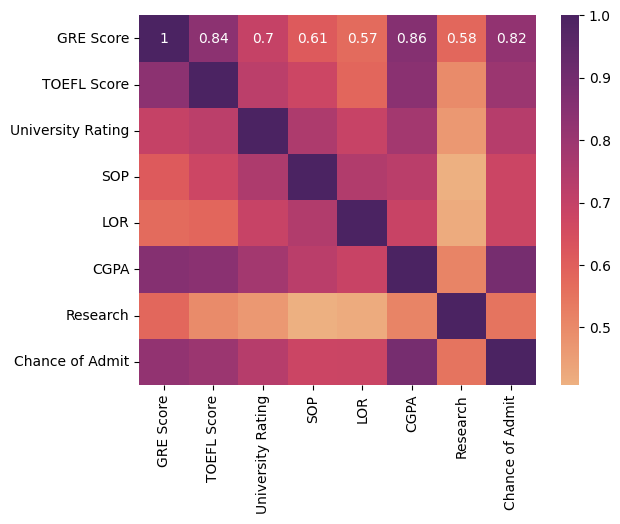

In [6]:
plot_correlations(X_train, y_train)

### Treinando um Modelo

In [7]:
model = LinearRegressor(parameters)
model.fit(X_train, y_train, False)

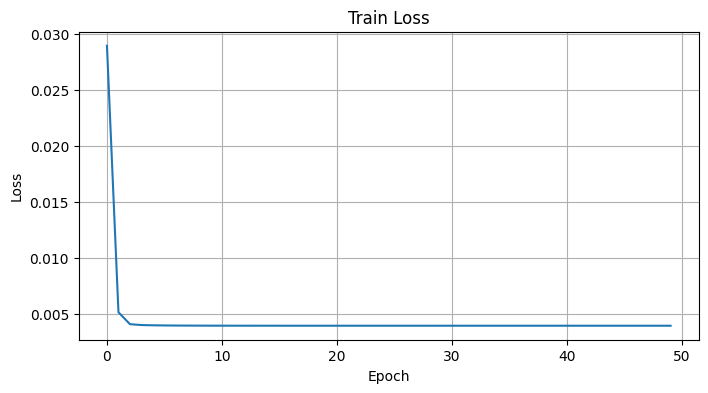

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(model.get_train_loss())
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

### Validação

Escolhendo o melhor valor de lambda (hiperparâmetro da regularização), ou seja, aquele que gera o menor loss na validação.

In [9]:
models = {}
lambdas = [round(x, 2) for x in np.arange(0, 1.05, 0.05)]
val_losses = []
for lambda_reg in lambdas:
    parameters = LinearRegressionParameters()
    parameters.lambda_reg = lambda_reg
    parameters.initial_weights = np.zeros(len(data.columns) - 1)
    parameters.epochs = 50
    parameters.batch_size = 20
    model = LinearRegressor(parameters)
    model.fit(X_train, y_train)
    models[lambda_reg] = model
    val_losses.append(loss(model, X_val, y_val))

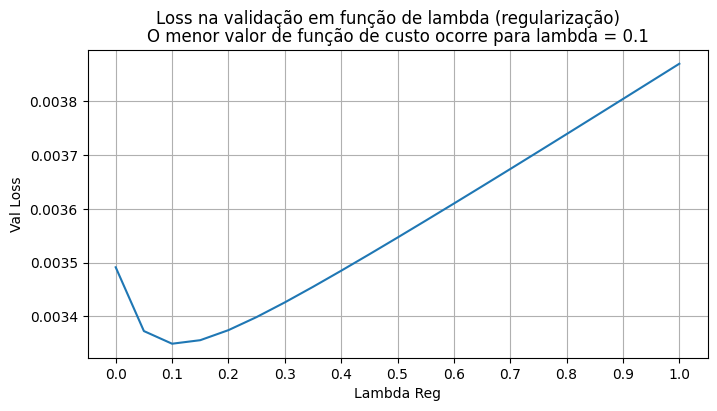

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(lambdas, val_losses)
plt.suptitle("Loss na validação em função de lambda (regularização)")
plt.title(f"O menor valor de função de custo ocorre para lambda = {lambdas[np.argmin(val_losses)]}")
plt.xlabel("Lambda Reg")
plt.ylabel("Val Loss")
plt.xticks([x for x in np.arange(0, 1.1, 0.1)])
plt.grid()

Para análise, vamos também verificar como o valor dos pesos se alteram em função de lambda. Como sabemos da regularização L2, o valor dos pesos deve, em geral, diminuir na medida em que lambda aumenta.

Text(0, 0.5, 'Weight')

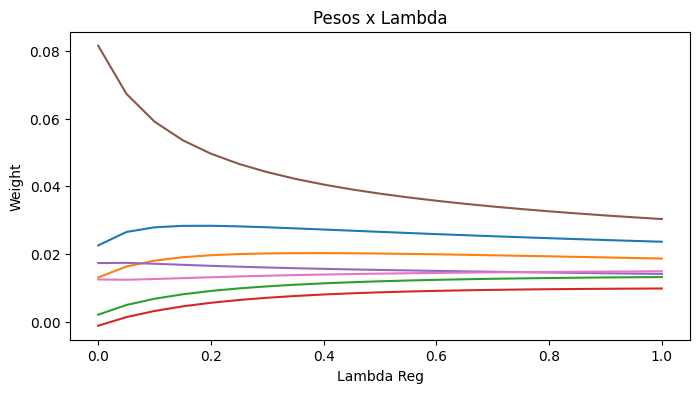

In [11]:
weights = []
for i in range(0, len(X_train.columns)):
    weights_i = []
    for key, model in models.items():
        weights_i.append(model.get_parameters().ws[i])
    weights.append(weights_i)

plt.figure(figsize=(8, 4))
for i in range(0, len(X_train.columns)):
    plt.plot(lambdas, weights[i])
plt.title('Pesos x Lambda')
plt.xlabel('Lambda Reg')
plt.ylabel('Weight')

### Teste

Com lambda = 0.1, vamos determinar finalmente o valor da função de custo no conjunto de teste.

In [12]:
parameters = LinearRegressionParameters()
parameters.lambda_reg = lambda_reg
parameters.initial_weights = np.zeros(len(data.columns) - 1)
parameters.epochs = 50
parameters.batch_size = 20

selected_model = LinearRegressor(parameters)
selected_model.fit(X_train, y_train)
loss(selected_model, X_test, y_test)

0.005820978827988404